# Notebook for Food Retail Analysis and Strategy - Mock Case
---
*By Patcharanat P.*

## Import library

In [1]:
import os
import numpy as np
import pandas as pd; pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('dark')

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Load data

In [3]:
df1 = pd.read_csv("dh_causal_lookup.csv")
df2 = pd.read_csv("dh_product_lookup.csv")
df3 = pd.read_csv("dh_store_lookup.csv")
df4 = pd.read_csv("dh_transactions.csv")

In [4]:
df1

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1
...,...,...,...,...,...,...
351367,9999966721,387,101,Wrap Front Feature,Not on Display,1
351368,9999966720,387,101,Wrap Front Feature,Not on Display,1
351369,3620000507,387,104,Interior Page Feature,Not on Display,1
351370,3620000493,387,104,Interior Page Feature,Not on Display,1


In [5]:
df2

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ
...,...,...,...,...,...
922,9999985217,PRIVATE LABEL ALPHABETS,pasta,Private Label,16 OZ
923,9999985260,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32 OZ
924,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,2 LB
925,9999985488,PRIVATE LABEL ITAL NESTED ANGEL HAIR,pasta,Private Label Premium,16 OZ


In [6]:
df3

,store,store_zip_code
0,1,37865
1,2,30084
2,3,30039
3,4,31210
4,5,30044
...,...,...
382,383,40502
383,384,42367
384,385,37160
385,386,29803


In [7]:
df4

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0


---

## EDA

df1

In [8]:
df1.isnull().sum()

upc             0
store           0
week            0
feature_desc    0
display_desc    0
geography       0
dtype: int64

In [9]:
df1['display_desc'].value_counts()

Not on Display                254776
Rear End Cap                   24656
In-Shelf                       20617
Secondary Location Display     14475
Front End Cap                  10178
In-Aisle                        9147
Promo/Seasonal Aisle            5329
Mid-Aisle End Cap               4675
Store Rear                      4250
Store Front                     2257
Side-Aisle End Cap              1012
Name: display_desc, dtype: int64

In [10]:
df1['feature_desc'].value_counts()

Interior Page Feature      192995
Not on Feature              78955
Front Page Feature          34049
Wrap Interior Feature       22203
Back Page Feature            7397
Interior Page Line Item      6001
Wrap Back Feature            5004
Wrap Front Feature           4768
Name: feature_desc, dtype: int64

In [11]:
df1['geography'].value_counts()

1    207193
2    144179
Name: geography, dtype: int64

In [12]:
len(df1['upc'].unique())

479

df1 contains duplicated upc values, and is not interpretable, so I will not use this Dataframe for further analysis.

df2

In [13]:
df2.isnull().sum()

upc                    0
product_description    0
commodity              0
brand                  0
product_size           0
dtype: int64

In [14]:
len(df2['upc'].unique())

927

df2 contains 927 products different

In [15]:
df2['brand'].value_counts()

Private Label            71
Barilla                  50
Ragu                     47
Private Label Premium    43
Prego                    40
                         ..
Fifty 50                  1
La Moderna                1
Vermont Gold              1
Maggi Spaetzle            1
Vincent's                 1
Name: brand, Length: 131, dtype: int64

In [16]:
len(df2['brand'].unique())

131

products are from 131 brands different

In [17]:
df2['commodity'].value_counts()

pasta            448
pasta sauce      294
syrups           139
pancake mixes     46
Name: commodity, dtype: int64

and 4 types of product different

In [18]:
series_temp = df2['product_size'].str.split()
for row in series_temp:
    print(row)

['25', 'OZ']
['40', 'OZ']
['19', 'OZ']
['12', 'OZ']
['19', 'OZ']
['26', 'OZ']
['26', 'OUNCE']
['26', 'OZ']
['26', 'OZ']
['26', 'OZ']
['26', 'OZ']
['26', 'OZ']
['26', 'OZ']
['16', 'OZ']
['16', 'OZ']
['17', 'OZ']
['16', 'OZ']
['16', 'OZ']
['26.5', 'OZ']
['12', 'OZ']
['12', 'OZ']
['26', 'OZ']
['KH#', '71916']
['26', 'OZ']
['26', 'OZ']
['26', 'OZ']
['26', 'OZ']
['5', 'OZ']
['10.5', 'OZ']
['5', 'OZ']
['15', 'OZ']
['24', 'OZ']
['16', 'OZ']
['24', 'OZ']
['24', 'OZ']
['5.5', 'OZ']
['12', 'OZ']
['12', 'OZ']
['26', 'OZ']
['26', 'OZ']
['16', 'OZ']
['7', 'OZ']
['16', 'OZ']
['7', 'OZ']
['N', '1', 'LB']
['32', 'OZ']
['N', '1', 'LB']
['1', 'LB']
['16', 'OZ']
['7', 'OZ']
['7', 'OZ']
['1', 'LB']
['16', 'OZ']
['16', 'Z']
['16', 'OZ']
['32', 'OZ']
['16', 'OZ']
['7', 'OZ']
['32', 'OZ']
['8', 'OZ']
['16', 'OZ']
['16', 'OZ']
['1', 'LB']
['12', 'OZ']
['2', 'LB']
['16OZ']
['16', 'OZ']
['16', 'OZ']
['16', 'OZ']
['12', 'OZ']
['12', 'OZ']
['12', 'OZ']
['13.25', 'OZ']
['13.25', 'OZ']
['13.25', 'OZ']
['13.25', 'OZ

from above, I can tell that column 'product_size' have problems that I have to deal with if I want use the column for analysis

df3

In [19]:
df3.isnull().sum()

store             0
store_zip_code    0
dtype: int64

df3 is useless for analysis I discard it from here.

df4

In [20]:
df4.isnull().sum()

upc                    0
dollar_sales           0
units                  0
time_of_transaction    0
geography              0
week                   0
household              0
store                  0
basket                 0
day                    0
coupon                 0
dtype: int64

In [21]:
df4.loc[df4['day'] == 1].head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


from above, I acknowledge that there are multiple rows for 1 basket, if a customer bought more that 1 product for a time. So I think market basket analysis method is available which will be expanded in the next part. 

In [22]:
df4.loc[df4['household'] == 125434].head(10)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
980464,3620000470,3.59,1,719,2,25,125434,270,622642,173,0
980465,7680828098,1.98,2,719,2,25,125434,270,622642,173,0
1054586,3620000470,3.59,1,2130,2,28,125434,270,669330,192,0
1142145,9999985051,1.59,1,1643,2,30,125434,270,725764,208,0
1142146,9999985028,0.79,1,1643,2,30,125434,270,725764,208,0
1142147,3620000470,7.18,2,1643,2,30,125434,270,725764,208,0
1142148,1510000256,0.79,1,1643,2,30,125434,270,725764,208,0
1673651,7680850295,1.19,1,1755,2,29,125434,270,1074644,201,0


from above, I know that 1 unit of customer (1 household) is able to comeback and purchase in different time.

In [23]:
df4['coupon'].value_counts()

0    5106493
1      91188
Name: coupon, dtype: int64

---

## Data Pre-processing for analysis

### Data Cleaning

Even we found no mssing value in any DataFrame, but still column *'product_size'* in *df2 (dh_product_lookup.csv)* seems to contain invalid value and inconsistent unit, so I need to clean it before analysis

In [24]:
from collections import Counter
from  itertools import chain

df_temp = pd.Series(Counter(chain(*df2.product_size.str.split()))).sort_values(ascending=False).head(30)
df_temp

OZ            809
16            232
26            120
12            108
24             58
LB             56
8              38
1              37
32             34
KH#            19
7              17
10             15
P              13
48             13
17             12
2              12
25             10
15             10
14              9
13.25           9
36              8
10OZ            8
OUNCE           7
##########      6
6               6
45              6
26.5            6
27.5            5
6.3             5
FL              5
dtype: int64

OZ is the most common unit, so I will use it as a common unit. Instead of specifying every case that have to be handle to clean, I will use only the column that contain 'OZ' or 'LB'.

In [25]:
# split element in column product size temp
df2['product_size_temp'] = df2['product_size'].str.split()

# iterate over df2
for index, row in df2.iterrows():
    # build temporary list for iteration for checking what it contains
    check_list = df2['product_size_temp'][index]

    # specify acceptable case 1
    if any(value in ['OZ', 'LB', 'OUNCE'] for value in check_list):
        if all(value in check_list for value in ['OZ', 'LB']):
            df2['product_size'][index] = float(check_list[0])*16 + float(check_list[2])
        elif any(value in ['OZ', 'OUNCE'] for value in check_list):
            if len(check_list) == 2:
                df2['product_size'][index] = float(check_list[0])
            elif len(check_list) == 3:
                if '1/2' in check_list:
                    df2['product_size'][index] = float(check_list[0]) + 0.5
                else:
                    try:
                        df2['product_size'][index] = float(check_list[1])
                    except:
                        df2['product_size'][index] = float(check_list[0])
        elif 'LB' in check_list:
            if len(check_list) == 2:
                df2['product_size'][index] = float(check_list[0])*16
            elif len(check_list) == 3:
                try:
                    df2['product_size'][index] = float(check_list[1])*16
                except:
                    df2['product_size'][index] = float(check_list[0])*16

    # specify acceptable case 2
    elif len(check_list) == 1:
        if 'OZ' in check_list[0]:
            df2['product_size'][index] = float(check_list[0][:-2])
        elif 'LB' in check_list[0]:
            df2['product_size'][index] = float(check_list[0][:-2])*16
        else:
            df2['product_size'][index] = np.nan
    else:
            df2['product_size'][index] = np.nan

In [26]:
df2 = df2.drop(columns=['product_size_temp'])
df2.rename({'product_size': 'product_size_OZ'}, axis=1, inplace=True)
df2

,upc,product_description,commodity,brand,product_size_OZ
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25.0
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40.0
2,566300028,MILLER CANE SYRUP,syrups,Miller,19.0
3,566300029,MILLER CANE SYRUP,syrups,Miller,12.0
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19.0
...,...,...,...,...,...
922,9999985217,PRIVATE LABEL ALPHABETS,pasta,Private Label,16.0
923,9999985260,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32.0
924,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32.0
925,9999985488,PRIVATE LABEL ITAL NESTED ANGEL HAIR,pasta,Private Label Premium,16.0


<AxesSubplot:>

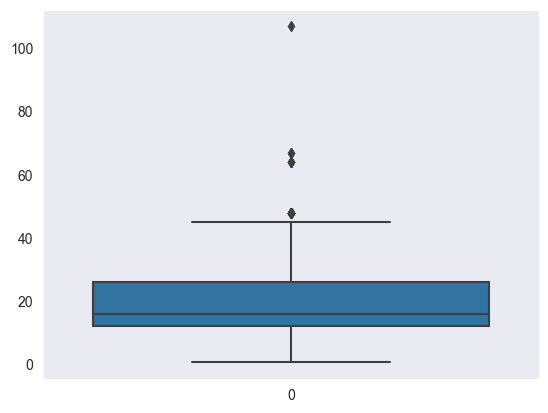

In [27]:
sns.boxplot(data=df2['product_size_OZ'])

'product_size_OZ' has outliers, so filling missing values with mean is not proper approach. I will use median instead.

In [28]:
df2['product_size_OZ'] = df2['product_size_OZ'].fillna(df2['product_size_OZ'].median())

In [29]:
df2.to_csv('dh_product_lookup_cleaned.csv', index=False)

And for df4 (transactions dataframe) I will create another column as 'total_dollar_units_sales'

In [30]:
df_temp = df4['dollar_sales']*df4['units']
df4.insert(loc=3, column='total_dollar_units_sales', value=df_temp)
df4.to_csv('dh_transactions_cleaned.csv', index=False)

### Data Transformation

Merging Transaction DataFrame and Product DataFrame as a new DataFrame for market basket analysis

In [31]:
df = pd.merge(left=df4, right=df2, on="upc")

create more column from 2 existing columns for more useful in further analysis

In [32]:
df['commodity_brand'] = df['commodity'] + '_' + df['brand']

In [33]:
df.head()

,upc,dollar_sales,units,total_dollar_units_sales,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size_OZ,commodity_brand
0,7680850106,0.8,1,0.8,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla
1,7680850106,0.8,1,0.8,1222,2,1,122481,352,43,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla
2,7680850106,1.6,2,3.2,1826,2,1,409606,314,84,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla
3,7680850106,0.8,1,0.8,1807,2,1,74246,344,103,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla
4,7680850106,0.8,1,0.8,1927,2,1,107310,252,192,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla


---

## Analysis

General visualization will be performed by PowerBI tool, but for statistical analysis will be perform in this notebook, and also market basket analysis.

2 DataFrame I will emphasize are df2: *'dh_product_lookup_cleaned.csv'* and df4: *'dh_transaction.csv'*

In [34]:
df2.head()

,upc,product_description,commodity,brand,product_size_OZ
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25.0
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40.0
2,566300028,MILLER CANE SYRUP,syrups,Miller,19.0
3,566300029,MILLER CANE SYRUP,syrups,Miller,12.0
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19.0


In [35]:
df4.head()

,upc,dollar_sales,units,total_dollar_units_sales,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,0.80,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,3.59,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,2.25,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,0.85,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,2.19,1323,2,1,89437,244,4,1,0


In [36]:
df.head()

,upc,dollar_sales,units,total_dollar_units_sales,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size_OZ,commodity_brand
0,7680850106,0.8,1,0.8,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla
1,7680850106,0.8,1,0.8,1222,2,1,122481,352,43,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla
2,7680850106,1.6,2,3.2,1826,2,1,409606,314,84,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla
3,7680850106,0.8,1,0.8,1807,2,1,74246,344,103,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla
4,7680850106,0.8,1,0.8,1927,2,1,107310,252,192,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla


In [37]:
df4.groupby(by='upc')['dollar_sales'].value_counts()

upc         dollar_sales
111112360   5.79            21
            5.99             2
            11.58            2
            4.99             1
            5.59             1
                            ..
9999985766  8.08             1
            9.45             1
            9.95             1
            10.00            1
            19.69            1
Name: dollar_sales, Length: 34631, dtype: int64

1 product (each UPC) has different selling cost which may be caused by discount.

In [38]:
df4['time_of_transaction'].max()/24

98.29166666666667

every approximate value 100 of time_of_transaction is equal 1 hour.

Text(0, 0.5, 'total_dollar_units_sales')

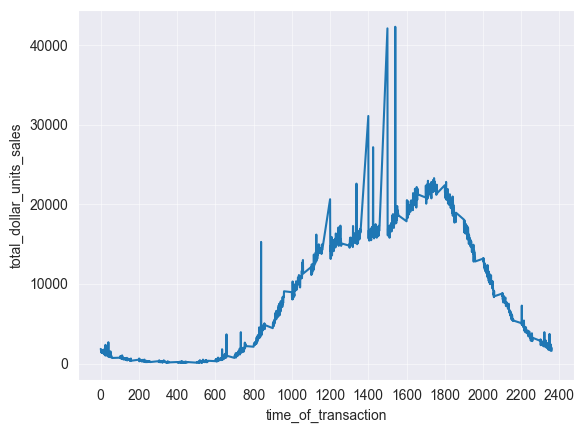

In [39]:
df4.groupby('time_of_transaction')['total_dollar_units_sales'].sum().plot(kind='line')
plt.xticks([200*i for i in range(13)])
plt.grid(True, alpha=0.5)
plt.ylabel('total_dollar_units_sales')

from line plot above, I can tell that people are likely came to buy from 6 A.M. and gradually increase, having peak hour around 8 to 9 A.M., 14 P.M., 15 P.M. Then after 18 P.M. sales gradually dropped meaning people came lesser after this point.

In [40]:
df4.day.max()/365

1.9945205479452055

data is recorded around 2 years of selling, but we will often use week for time series analysis because it give more sense for overall insights.

In [41]:
df4.groupby(by=['household'])['total_dollar_units_sales'].sum().describe()

count    510027.000000
mean         24.367489
std          83.711808
min          -4.160000
25%           3.490000
50%           9.520000
75%          26.300000
max       26588.620000
Name: total_dollar_units_sales, dtype: float64

Customer averagely spent 24.38$ (std 83.71$) in 2 years for each customer unit.

In [42]:
df4.groupby(by=['basket'])['total_dollar_units_sales'].sum().describe()

count    3.316349e+06
mean     3.747518e+00
std      2.397776e+01
min     -3.370000e+01
25%      1.390000e+00
50%      2.380000e+00
75%      4.000000e+00
max      2.558907e+04
Name: total_dollar_units_sales, dtype: float64

For each time customer buy (per basket) customer averagely spent 3.75$ (std 2.4$)

In [43]:
times_2year = df4.loc[~(df4['basket'].duplicated())].groupby('household')['basket'].count().describe()
times_1year = (df4.loc[~(df4['basket'].duplicated())].groupby('household')['basket'].count()/2).describe()
times_month = (df4.loc[~(df4['basket'].duplicated())].groupby('household')['basket'].count()/(24)).describe()

print('customer averagely bought times per 2 years: ', times_2year['mean'].round(3), ', std: ', times_2year['std'].round(3))
print('customer averagely bought times per year: ', times_1year['mean'].round(3), ', std: ', times_1year['std'].round(3))
print('customer averagely bought times per month: ', times_month['mean'].round(3), ', std: ', times_month['std'].round(3))

customer averagely bought times per 2 years:  6.502 , std:  8.916
customer averagely bought times per year:  3.251 , std:  4.458
customer averagely bought times per month:  0.271 , std:  0.371


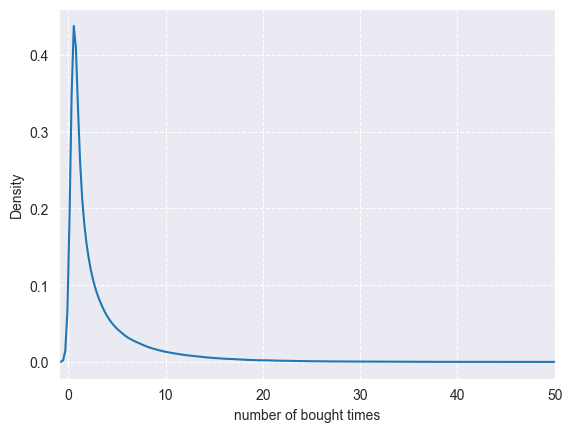

In [44]:
(df4.loc[~(df4['basket'].duplicated())].groupby('household')['basket'].count()/2).plot(kind='kde')
plt.xlim([-1, 50])  
plt.xlabel("number of bought times")
plt.grid(True, alpha=1, linestyle="--")
plt.show()

from line plot and statistic above, we see that most people didn't buy often.

In [45]:
series_temp1 = (df4.loc[~(df4['basket'].duplicated())].groupby('household')['basket'].count()/2).sort_index()
series_temp2 = df4.groupby('household')['total_dollar_units_sales'].sum().sort_index()
series_ticket_size = series_temp2/series_temp1

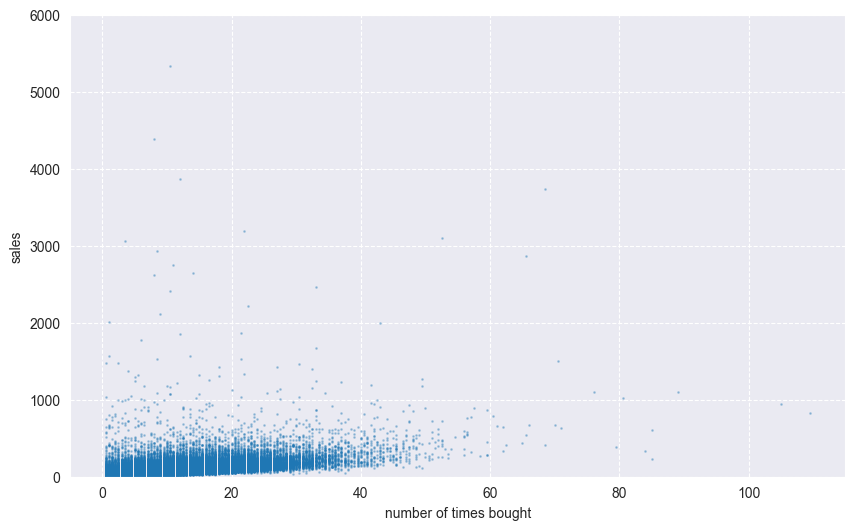

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(x=series_temp1, y=series_temp2, s=1, alpha=0.3)
plt.ylim([0, 6000])
plt.xlabel('number of times bought')
plt.ylabel('sales')
plt.grid(linestyle='--')

from scatter plot above, we can see a trend implying that the more often people bought, the more sales the retail business could get.

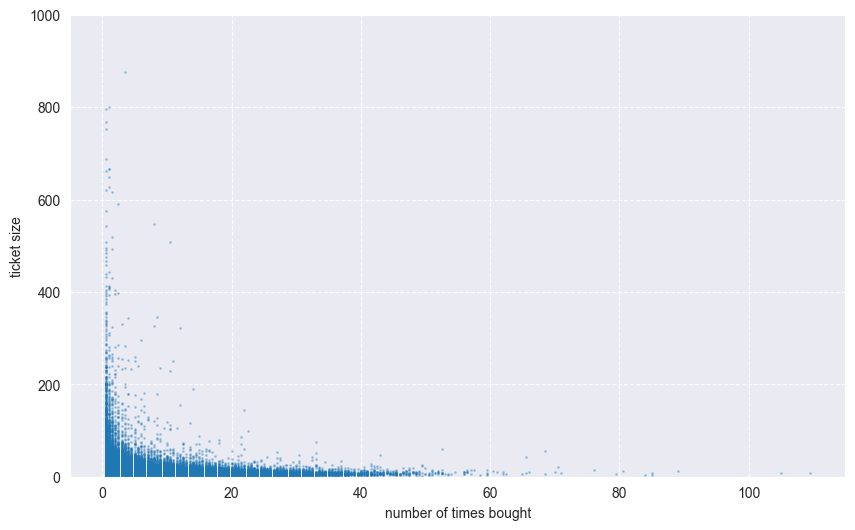

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(x=series_temp1, y=series_ticket_size, s=1, alpha=0.3)
plt.ylim([0, 1000])
plt.xlabel('number of times bought')
plt.ylabel('ticket size')
plt.grid(linestyle='--')

from scatter plot above, it could conclude customers' behavior that the more often people bought the lesser ticket size they did. (sales per transaction = ticket size)

continue analysis with df

In [48]:
df.head()

,upc,dollar_sales,units,total_dollar_units_sales,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size_OZ,commodity_brand
0,7680850106,0.8,1,0.8,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla
1,7680850106,0.8,1,0.8,1222,2,1,122481,352,43,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla
2,7680850106,1.6,2,3.2,1826,2,1,409606,314,84,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla
3,7680850106,0.8,1,0.8,1807,2,1,74246,344,103,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla
4,7680850106,0.8,1,0.8,1927,2,1,107310,252,192,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla


product_size_OZ
16.0    3566802.88
26.0    2866315.88
24.0    1215674.65
32.0     869828.83
12.0     773347.22
           ...    
10.6         17.45
1.1          10.43
16.9          6.99
20.0          5.69
0.5           1.69
Name: total_dollar_units_sales, Length: 62, dtype: float64


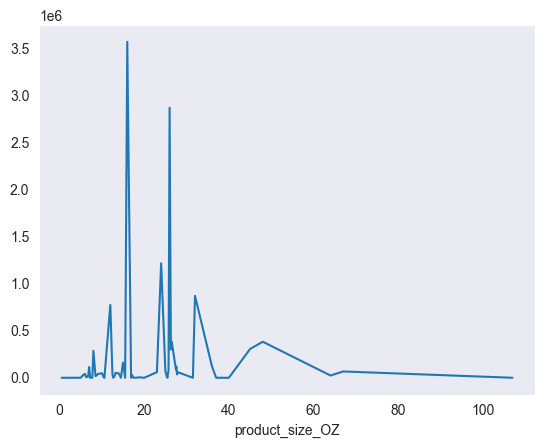

In [49]:
df.groupby('product_size_OZ')['total_dollar_units_sales'].sum().plot()
print(df.groupby('product_size_OZ')['total_dollar_units_sales'].sum().sort_values(ascending=False))

from observation above, we can see that product size didn't have significant trend, but product with 16, 26, 24, 32, ... OZ seems to have exceptionally sales. Still, we're not able to conclude that product size directly affect to the sales.

In [50]:
df['sales_per_OZ'] = df['dollar_sales'] / df['product_size_OZ']
df.head()

,upc,dollar_sales,units,total_dollar_units_sales,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size_OZ,commodity_brand,sales_per_OZ
0,7680850106,0.8,1,0.8,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla,0.05
1,7680850106,0.8,1,0.8,1222,2,1,122481,352,43,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla,0.05
2,7680850106,1.6,2,3.2,1826,2,1,409606,314,84,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla,0.10
3,7680850106,0.8,1,0.8,1807,2,1,74246,344,103,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla,0.05
4,7680850106,0.8,1,0.8,1927,2,1,107310,252,192,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16.0,pasta_Barilla,0.05


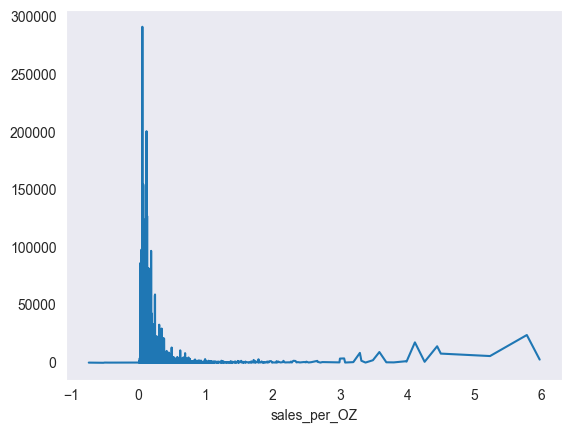

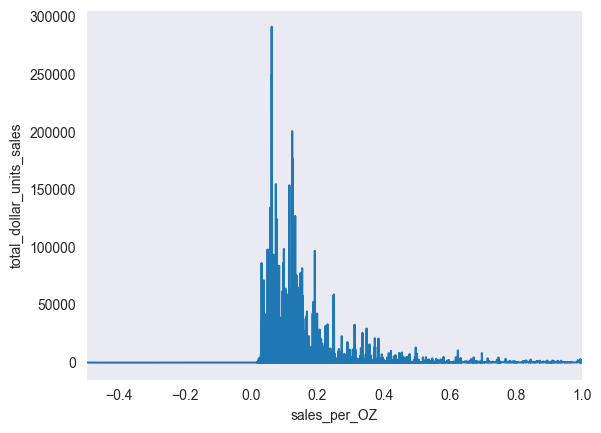

In [51]:
df.groupby('sales_per_OZ')['total_dollar_units_sales'].sum().plot()
plt.show()
df.groupby('sales_per_OZ')['total_dollar_units_sales'].sum().plot()
plt.xlim([-0.5, 1])
plt.ylabel('total_dollar_units_sales')
plt.show()

from a graph above (the first and and the second are the same graph with different axis), we get a little more sense that the more cheaper the more people tends to buy. Somehow, there's inconsistent in the trend, so I assume that there's must be something else that affect such as brand, or type of product they preferred.

<AxesSubplot:ylabel='product_description'>

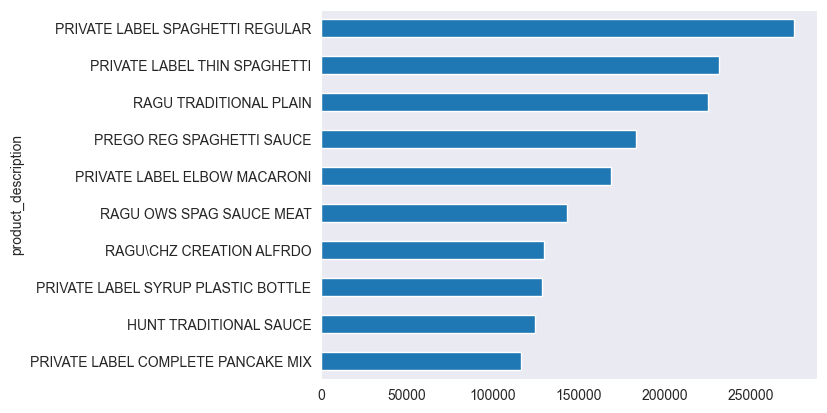

In [52]:
df.groupby('product_description')['total_dollar_units_sales'].sum().sort_values(ascending=True).tail(10).plot(kind='barh')

As you can see from bar chart, the most popular products are likely to be the most plain, such as regular spaghetti, traditional plain sauce, etc.

In [53]:
df2.loc[(df2['commodity'] == 'pasta') & (df2['brand'] == 'Private Label')].head(10)

,upc,product_description,commodity,brand,product_size_OZ
866,9999984381,PRIVATE LABEL FARFALLE BOX,pasta,Private Label,12.0
868,9999985001,PRIVATE LABEL THIN SPAGHETTI,pasta,Private Label,7.0
869,9999985002,PRIVATE LABEL ELBOW MACARONI,pasta,Private Label,8.0
871,9999985004,PRIVATE LABEL SPAGHETTI REGULAR,pasta,Private Label,16.0
872,9999985005,PRIVATE LABEL SPAGHETTI REGULAR,pasta,Private Label,32.0
873,9999985006,PRIVATE LABEL SPAGHETTI REGULAR,pasta,Private Label,48.0
874,9999985020,PRIVATE LABEL THIN SPAGHETTI,pasta,Private Label,16.0
875,9999985021,PRIVATE LABEL ELBO MACARONI,pasta,Private Label,16.0
876,9999985027,PRIVATE LABEL LASAGNA PASTA,pasta,Private Label,16.0
877,9999985028,PRIVATE LABEL RIGATONI,pasta,Private Label,16.0


from DataFrame above, we see that one type, and one brand have many different products as subsets.

<AxesSubplot:ylabel='commodity_brand'>

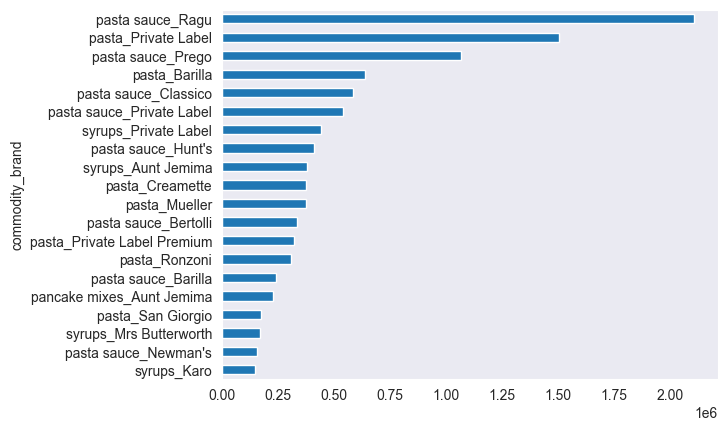

In [54]:
df.groupby('commodity_brand')['total_dollar_units_sales'].sum().sort_values(ascending=True).tail(20).plot(kind='barh')

---

## Market basket analysis

In [55]:
basket = df.groupby(['basket', 'commodity_brand'])['units'].sum().unstack().reset_index().fillna(0).set_index('basket')
basket

commodity_brand,pancake mixes_Aunt Jemima,pancake mixes_Bisquick,pancake mixes_Bruce's,pancake mixes_Classique,pancake mixes_Fastshake,pancake mixes_Hodgson Mills,pancake mixes_Hungry Jack,pancake mixes_Krusteaz,pancake mixes_Lund Swede,pancake mixes_M W Flapstax,...,syrups_Pine Mountain,syrups_Private Label,syrups_Private Label Premium,syrups_Private Label Value,syrups_Sand Mountain,syrups_Smuckers,syrups_Sobrab Bkstrp,syrups_Spring Tree,syrups_Tree of Life,syrups_Vermont Gold
basket,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3316346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3316347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [57]:
basket_temp = basket.applymap(encode_units)

In [58]:
basket_temp_filtered = basket_temp[(basket_temp > 0).sum(axis=1) >= 2]

In [59]:
basket_temp_filtered

commodity_brand,pancake mixes_Aunt Jemima,pancake mixes_Bisquick,pancake mixes_Bruce's,pancake mixes_Classique,pancake mixes_Fastshake,pancake mixes_Hodgson Mills,pancake mixes_Hungry Jack,pancake mixes_Krusteaz,pancake mixes_Lund Swede,pancake mixes_M W Flapstax,...,syrups_Pine Mountain,syrups_Private Label,syrups_Private Label Premium,syrups_Private Label Value,syrups_Sand Mountain,syrups_Smuckers,syrups_Sobrab Bkstrp,syrups_Spring Tree,syrups_Tree of Life,syrups_Vermont Gold
basket,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316323,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3316339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3316340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
basket_temp_filtered.shape[0] / basket_temp.shape[0]

0.3332888064555329

from above, only 33.33% of transaction buying more than 1 product per transaction.

In [62]:
frequent_itemsets = apriori(basket_temp_filtered, min_support=0.03, use_colnames=True)
frequent_itemsets

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.050309,(pancake mixes_Aunt Jemima)
1,0.030673,(pasta sauce_Barilla)
2,0.042238,(pasta sauce_Bertolli)
3,0.066946,(pasta sauce_Classico)
4,0.086188,(pasta sauce_Hunt's)
5,0.162533,(pasta sauce_Prego)
6,0.107075,(pasta sauce_Private Label)
7,0.327852,(pasta sauce_Ragu)
8,0.136442,(pasta_Barilla)
9,0.090273,(pasta_Creamette)


In [63]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.05)
rules.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(pasta sauce_Private Label),(pasta_Private Label),0.107075,0.423098,0.066752,0.623414,1.473450,0.021449,1.531925
4,(pasta_Private Label),(pasta sauce_Private Label),0.423098,0.107075,0.066752,0.157769,1.473450,0.021449,1.060191
0,(pasta_Private Label),(pasta sauce_Hunt's),0.423098,0.086188,0.046711,0.110403,1.280951,0.010245,1.027220
1,(pasta sauce_Hunt's),(pasta_Private Label),0.086188,0.423098,0.046711,0.541968,1.280951,0.010245,1.259522
10,(pasta sauce_Ragu),(pasta_Mueller),0.327852,0.087683,0.036467,0.111230,1.268550,0.007720,1.026494
11,(pasta_Mueller),(pasta sauce_Ragu),0.087683,0.327852,0.036467,0.415896,1.268550,0.007720,1.150735
8,(pasta sauce_Ragu),(pasta_Creamette),0.327852,0.090273,0.033996,0.103694,1.148667,0.004400,1.014973
9,(pasta_Creamette),(pasta sauce_Ragu),0.090273,0.327852,0.033996,0.376592,1.148667,0.004400,1.078184
12,(pasta sauce_Ragu),(pasta_Private Label),0.327852,0.423098,0.149335,0.455495,1.076571,0.010621,1.059498
13,(pasta_Private Label),(pasta sauce_Ragu),0.423098,0.327852,0.149335,0.352956,1.076571,0.010621,1.038798


---